## Food Fun in Bengaluru
Bangalore has a wide and varied mix of restaurant types and cuisines and Bangaloreans deem eating out as an intrinsic part of their culture. Restaurants from all over the world can be found here in Bengaluru. This Zomato dataset aims at analysing different food varieties in different locations. The __[dataset](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)__ containing 51717 restaurants address, name of the restaurant, is online order available, is booking table available, rating, location, cuisines, popular dishes, approximate cost for two people and the reviews.

This analysis will help people understand the average cost, rating, menu, quality of restaurants if they decide an area in which they want to eat food. They will also be able to understand if they can easily find a restaurant to eat under Rs. 350 for two people in a given area. Restaurant finder will list restaurants in the given area, for a given budget and type. Based on reviews, people can pick a good place to enjoy their meal. Restaurant owners can also look at the review analysis to see what their customers feel and work on increasing customer satisfaction.

We will investigate and analyze the following:
1. Rating distribution, Restaurants in different localities, famous restaurant chains, meal types, restaurant types, cuisines
2. Average eating cost, locality-wise average rating, locality-wise average cost
3. Relationship between rate and cost, restaurant type and rate, online orders and votes
4. Locality-wise top rated restaurants
5. Area to Invest Using z-scores
6. Probability of getting food for two people in Rs. 350
7. Total combinations of cafes and casual dining in a particular location
8. Restaurant-finder for the given location, budget and type
9. Plot Restaurant Locations, famous quick bites and cafes on Map
10. Wordcloud of Reviews Based on Restaurant Name and Rating, Cuisines


### Summary
1.  Majority of the ratings are between 3.5 - 4.3.
2. Given that BTM is one of the most popular residential and commercial places in Bengaluru, it has the highest number of restaurants, followed by Kormangala 5th block.
3. Given that the first CCD outlet was set up at Brigade Road in Bengaluru in 1996, Cafe Coffee Day followed by Onesta are famous chains in Bengaluru.
4. Maximum number of restaurants have delivery option, so you can order your food without leaving your house or hotel! There are a variety of dessert places, cafes, drinks, buffet places and bars.
5. Majority of the restaurants are Quick Bites, followed by Casual Dining restaurants. North Indian and Chinese are popular cuisines. 
6. Vast majority of the restaurants serve food for budget less than Rs. 1000. The median approximate cost for two people is Rs. 500 for a single meal. You can find good food for a reasonable price.
7. Lavelle Road has the highest average rating of 4.16 followed by Kormangla 3rd Block, 5th Block, Church Street and St. Marks Road. Old Madras road has the lowest averagae rating of 3.18, followed closely by Bommanahalli and Peenya.
8. Bengaluru, known as the pub capital of India has many high rated Pubs and Breweries followed by cafes.
9. Restaurants accepting online orders tend to get more votes from customers.

### Read Data

In [66]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style 
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
import re
from wordcloud import WordCloud,STOPWORDS
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm

In [67]:
#Read data from csv file
restaurants = pd.read_csv("zomato.csv")

In [68]:
#Check data
pd.set_option('display.max_colwidth', 50)
print (restaurants.shape)
restaurants.head(2)

(51717, 17)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775  080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

### Data Cleaning
Before we can start analyzing the dataset, cleaning our data is an important pre-requisite to get correct analysis results. We will work on:
1. Handling null data
2. Cleaning column names
3. Changing datatypes
4. Cleaning values in columns
5. Dropping unwanted columns

In [69]:
#Check null values in the data
(restaurants.isnull().sum() / restaurants.shape[0] ) * 100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

1. Rate is an important field having 15% null values, but we cannot replace these null values with any other values, also if we drop all these columns, we might loose important information. For now, we will leave the null values as they are. 
2. Null values in dish_liked would not affect our analysis, we will leave these values also as they are.

In [70]:
#check the datatype
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [71]:
#Let us examine the rate column
restaurants["rate"].value_counts(dropna=False)

NaN       7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1/5     1474
4.1 /5    1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
4.8/5       23
2.3 /5      23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 65, dtype: int64

There are some restaurants who are new and have not yet received any rating and some have '-' in the rating. We will assign rating of null to these restaurants.

In [72]:
#Replace string values with nulls
restaurants.loc[restaurants["rate"] == "NEW"] = np.nan
restaurants.loc[restaurants["rate"] == "-"] = np.nan
restaurants.loc[restaurants["rate"] == "nan"] = np.nan

The rate column is string type with an extra /5 with all the ratings. This should be cleaned convert the string to float for calculations.

In [73]:
restaurants["rate"] = restaurants["rate"].str.replace("/5","")
restaurants['rate'] = pd.to_numeric(restaurants['rate'])

In [74]:
#Check the null values in 'rate' field
(restaurants.isnull().sum() / restaurants.shape[0] ) * 100

url                             4.402808
address                         4.402808
name                            4.402808
online_order                    4.402808
book_table                      4.402808
rate                           19.436549
votes                           4.402808
phone                           6.703792
location                        4.443413
rest_type                       4.837868
dish_liked                     54.575865
cuisines                        4.489820
approx_cost(for two people)     5.062165
reviews_list                    4.402808
menu_item                       4.402808
listed_in(type)                 4.402808
listed_in(city)                 4.402808
dtype: float64

The null values having increased after converting 'NEW' and '-' values to null in the data.

We will change the datatype of votes column to numeric for easier analysis.

In [75]:
#Convert datatype
restaurants['votes'] = pd.to_numeric(restaurants['votes'])

We will remove the ',' separating different dishes for easier analysis.

In [76]:
#Clean column
restaurants['dish_liked']=restaurants['dish_liked'].str.replace(",", "")

In [77]:
#Rename column names
restaurants.rename(columns = {'approx_cost(for two people)': 'average_cost', 
                              'listed_in(city)': 'locality',
                              'listed_in(type)': 'meal_type'}, inplace=True)
restaurants.head(2)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1  775.0  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1  787.0                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta Lunch Buffet Masala Papad Paneer Lajawab...   
1  Momos Lunch Buffet Chocolate Nirvana Thai Gree...   

                         cuisines average_cost  \
0  North Indian, Mughlai, Chinese          800   
1     Chinese, North Indian, Thai          800   

                                        reviews_list menu_item meal_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []    Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []    Buffet   

       locality  
0  Banashankari  
1  Banashankari

Clean average cost column to remove ',' and convert to numeric datatype.

In [78]:
restaurants['average_cost'] = restaurants['average_cost'].str.replace(",", "")
restaurants["average_cost"].value_counts()
restaurants["average_cost"] = pd.to_numeric(restaurants['average_cost'])

We will not need columns like url, address, phone for our analysis. Also, the 'location' and 'locality' columns have similar information, we will drop 'locality'.

In [79]:
#Drop columns not needed for analysis
del restaurants["url"]
del restaurants["address"]
del restaurants["phone"]
del restaurants["locality"]

In [80]:
#Check data
restaurants.head(2)

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1  775.0  Banashankari   
1  Spice Elephant          Yes         No   4.1  787.0  Banashankari   

       rest_type                                         dish_liked  \
0  Casual Dining  Pasta Lunch Buffet Masala Papad Paneer Lajawab...   
1  Casual Dining  Momos Lunch Buffet Chocolate Nirvana Thai Gree...   

                         cuisines  average_cost  \
0  North Indian, Mughlai, Chinese         800.0   
1     Chinese, North Indian, Thai         800.0   

                                        reviews_list menu_item meal_type  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []    Buffet  
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []    Buffet

In [81]:
#Check number of records
restaurants.shape

(51717, 13)

In [82]:
#Drop duplicate records if any
restaurants.drop_duplicates(inplace=True)

We will also drop restaurants for which we don't have names.

In [83]:
df_drop_rows = restaurants[restaurants["name"] == "0"]
restaurants = restaurants.drop(df_drop_rows.index, axis = 0)

In [84]:
#Recheck number of records for duplicates
restaurants.shape

(38900, 13)

In [85]:
#Drop rows containing null values in below columns
restaurants.dropna(subset=["name", "location", "cuisines", "average_cost", "rest_type"], inplace = True)

In [98]:
#Check final null values
(restaurants.isnull().sum() / restaurants.shape[0] ) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            10.796561
votes            0.000000
location         0.000000
rest_type        0.000000
dish_liked      45.217256
cuisines         0.000000
average_cost     0.000000
reviews_list     0.000000
menu_item        0.000000
meal_type        0.000000
dtype: float64

In [87]:
restaurants.shape

(38503, 13)

We have null values in rate and dish_liked which we will handle below when we work with these columns. Now that our data is clean, we will start with the analysis.

### Data Analysis
In this section, we will: 
1. How are restaurants distributed in different locations of Bengaluru and what is the variation in ratings, count, number of restaurant chains, meal types, cuisines and average cost across locations?
2. Is there any relation between online orders and number of votes?
3. Which is the best location to open a new restaurant where Rs.450 is an average cost for a meal?
4. Can we easily find food in Rs. 350 for two people in Bengaluru?
5. If you are in a particular location and feel like going to a cafe and Casual Dining in less than Rs.350, how many options are available for you have to choose from?
6. How many restaurants are there in the location of your choice, of the cuisine of your liking in your budget for two people?


#### Rating Distribution
What is the rating distribution across all the restaurants? Let us use a kde plot to find out.

In [88]:
#Ratio variable representation by kde
print ("Rating Percentage:")
print (restaurants['rate'].value_counts(normalize = True) * 100)

Rating Percentage:
3.9    10.039015
3.8     9.165551
3.7     9.162639
4.0     8.163978
4.1     7.788389
3.6     7.599138
3.5     5.927910
4.2     5.846387
3.4     5.211669
4.3     4.707972
3.3     4.617714
3.2     3.819950
3.1     3.380306
4.4     3.281314
3.0     2.311768
4.5     1.883771
2.9     1.869213
2.8     1.400454
4.6     0.867641
2.7     0.797764
2.6     0.588133
4.7     0.486228
2.5     0.262039
4.8     0.192162
4.9     0.160135
2.4     0.160135
2.3     0.131020
2.1     0.069877
2.2     0.064054
2.0     0.029115
1.8     0.014558
Name: rate, dtype: float64


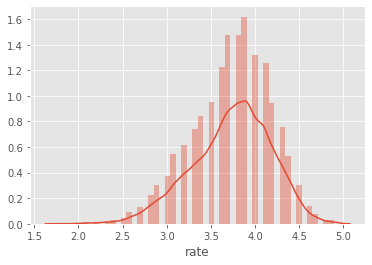

In [89]:
#Drop null values before plotting
rest_rates = restaurants[restaurants['rate'].notnull()]

#Plot rate column
sns.distplot(rest_rates.rate)

Majority of the ratings are between 3.5 - 4.3.

#### Locality-wise Number of Restaurants
Which locations have the highest number of restaurants? If you are trying to find a new place to move, you can choose a location based on this data!

In [90]:
#Plot locality-wise restaurant counts
locality_rest_count_bar = go.Bar(x = restaurants["location"].value_counts().head(15).index, 
                                    y = restaurants["location"].value_counts().head(15).values)
layout = go.Layout(title = "LOCALITY-WISE RESTAURANT COUNTS", yaxis_title = "Restaurant Count")
fig = go.Figure(locality_rest_count_bar,layout)
iplot(fig)

1. BTM has the highest number of restaurants, followed by Kormangala 5th block, but with a difference of approximately 1200 restaurants. 
2. It makes sense to have more restaurants in BTM, as it is one of the most popular residential and commercial places in Bengaluru.

#### Famous Restaurant Chains
If you are in Bengaluru, would you be able to enjoy food from your favourite restaurant chain?

In [91]:
#Plot famous restaurant chains
rest_chains_bar = go.Bar(x = restaurants["name"].value_counts().head(20).index, 
                                    y = restaurants["name"].value_counts().head(20).values)
layout = go.Layout(title = "FAMOUS RESTAURANT CHAINS", yaxis_title = "Count")
fig = go.Figure(rest_chains_bar,layout)
iplot(fig)

Given that the first CCD outlet was set up at Brigade Road in Bengaluru in 1996, Cafe Coffee Day followed by Onesta have a lot of outlets in Bengaluru. Top 20 chains have some well-known names like Kanti sweets, KFC, Domino's Pizza, Pizza Hut, Subway, McDonald's and Faasos.

#### Meal Types in Bengaluru
What are the different meal types available in the city for your convenience?

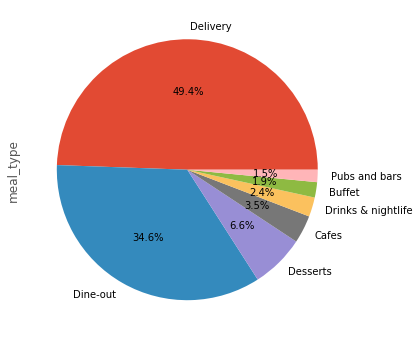

In [92]:
#Nominal variable representation using pie chart
restaurants['meal_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Maximum number of restaurants have delivery option, so you can order your food without leaving your house or hotel! There are a  variety of dessert places, cafes, drinks, buffet places and bars.

#### Restaurant Types in Bengaluru
Which restaurant type would you find the most in Bengaluru?

In [93]:
#Plot restaurant types
rest_types_bar = go.Bar(x = restaurants["rest_type"].value_counts().head(20).index, 
                                    y = restaurants["rest_type"].value_counts().head(20).values)
layout = go.Layout(title = "RESTAURANT TYPES", yaxis_title = "Count")
fig = go.Figure(rest_types_bar,layout)
iplot(fig)

1. Majority of the restaurants are Quick Bites which makes sense as Bengaluru being a fast-paced and a cosmopolitan IT Tech City, working people would prefer quick bites restaurants.
2. They are followed by Casual Dining restaurants, which people maybe visit on weekdays for dinner or weekend meals.

#### Cuisines in Bengaluru
Let us look at the different cuisines available in Bengaluru.

In [94]:
#Plot different cuisines in Bengaluru
cuisines_bar = go.Bar(x = restaurants["cuisines"].value_counts().head(20).index, 
                                    y = restaurants["cuisines"].value_counts().head(20).values)
layout = go.Layout(title = "CUISINES", yaxis_title = "Count")
fig = go.Figure(cuisines_bar,layout)
iplot(fig)

North Indian and Chinese are quite popular. The diversity of the cuisine available is reflective of the social and economic diversity of Bengaluru. It correlates with Bengaluru being called a foodie's paradise because of its vast variety of foods and edibles with a touch of Bengaluru's uniqueness and tradition.

#### Average Eating Cost For Two People in Bengaluru
Let us see the variation in the number of restaurants delivering food in brackets of Rs. 500.

In [95]:
#Select count of restaurants based on cost
restaurants["average_cost"].value_counts()

#Define intervals
intervals = pd.interval_range(start = 0, end = 5000, freq = 500)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)

#Construct a frequency dictionary
for value in restaurants['average_cost']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

(0, 500]        23298
(500, 1000]     10541
(1000, 1500]     3154
(1500, 2000]     1005
(2000, 2500]      259
(2500, 3000]      179
(3000, 3500]       37
(3500, 4000]       22
(4000, 4500]        5
(4500, 5000]        1
dtype: int64


Majority of the restaurants serve food for less than Rs. 1000. Using distplot to analyze the ratio variable - average_cost, let us see the variation.

592.3135340103369

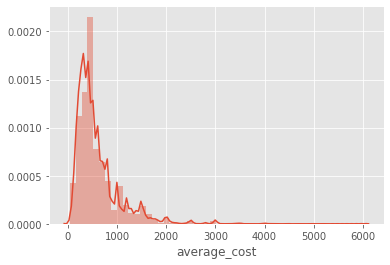

In [97]:
style.use('ggplot')
#Drop null values before plotting
rest_avg = restaurants[restaurants['average_cost'].notnull()]

#Plot rate column
sns.distplot(rest_avg.average_cost)

#Mean cost in Bengaluru
rest_avg["average_cost"].mean()

1. We can see that the distribution if left skewed. As seen above as well, almost 90% of restaurants serve food for budget less than Rs. 1000.
2. The median approximate cost for two people is 500 for a single meal.

#### Average Rating in Each Locality
Would you find good rated restaurants in and around your locality?

In [99]:
##Drop restaurants with null values before plotting
rating_not_null = restaurants[restaurants["rate"].notnull()]

#Select locality-wise highest rating
top_avg_rating_locality = rating_not_null.groupby("location", as_index = False)["rate"].mean().sort_values("rate", ascending = False).head(20)

#Plot data for location-wise highest average rating
top_avg_rating_locality_bar = go.Bar(x = top_avg_rating_locality["location"], y = top_avg_rating_locality["rate"])
layout = go.Layout(title = "LOCALITY-WISE HIGHEST AVERAGE RATING", yaxis_title = "Rating")
fig = go.Figure(top_avg_rating_locality_bar, layout)
iplot(fig)

Lavelle Road has the highest average rating of 4.16. Lavelle Road is an upmarket residential and commercial street in the city. This part is known to modern Benglaureans as a state-of-the-art, uber luxurious lifestyle hub. Given the background, it means that luxurious and high rating restaurants are located here.
Kormangla 3rd Block, 5th Block, Church Street and St. Marks Road have an average rating of more than 4.0.

In [100]:
#Select locality-wise lowest rating
lowest_avg_rating_locality = rating_not_null.groupby("location", as_index = False)["rate"].mean().sort_values("rate", ascending = False).tail(20)

#Plot data for location-wise lowest average rating
lowest_avg_rating_locality_bar = go.Bar(x = lowest_avg_rating_locality["location"], y = lowest_avg_rating_locality["rate"])
layout = go.Layout(title = "LOCALITY-WISE LOWEST AVERAGE RATING", yaxis_title = "Rating")
fig = go.Figure(lowest_avg_rating_locality_bar, layout)
iplot(fig)

Old Madras road has the lowest avergae rating of 3.18, followed closely by Bommanahalli and Peenya.
Old Madras Road was initially an outright industrial area, but now is slowly developing and has a blend of both, residential and commercial establishments. 

#### Restaurant Type and Rate
Which good quality (high rated) restaurants would you find in Bengaluru?

In [101]:
#Plot data for restaurant type average rating
type_rate = rating_not_null.groupby("rest_type", as_index = False)["rate"].mean().sort_values("rate", ascending = False).head(20)

#Plot data for restaurant type and rate
lowest_avg_rating_locality_bar = go.Bar(x = type_rate["rest_type"], y = type_rate["rate"])
layout = go.Layout(title = "AVERAGE RATING FOR DIFFERENT RESTAURANT TYPES", yaxis_title = "Rating")
fig = go.Figure(lowest_avg_rating_locality_bar, layout)
iplot(fig)

Bengaluru is known as the pub capital of India. No wonder, pubs and breweries have high average ratings followed by cafes.

#### Average Cost of Food in Each Location
Where can you find the costliest and cheapest food in Bengaluru?

In [102]:
#Costly restaurant locations
high_cost_rest = restaurants.groupby("location", as_index = False)["average_cost"].mean().sort_values("average_cost", ascending = False).head(20)#.plot.barh(figsize = (8,6))

#Plot data for costly restaurant localities
high_cost_rest_bar = go.Bar(x = high_cost_rest["location"], y = high_cost_rest["average_cost"])
layout = go.Layout(title = "HIGH COST RESTAURANT LOCALITIES", yaxis_title = "Average cost")
fig = go.Figure(high_cost_rest_bar, layout)
iplot(fig)

Sankey Road has the costliest restaurant followed by Lavelle Road (which has the highest average rating), Race Course Road and MG Road.

In [103]:
#Cheap restaurant locations
low_cost_rest = restaurants.groupby("location", as_index = False)["average_cost"].mean().sort_values("average_cost", ascending = False).tail(20)#.plot.barh(figsize = (8,6))

#Plot data for cheap restaurant localities
low_cost_rest_bar = go.Bar(x = low_cost_rest["location"], y = low_cost_rest["average_cost"])
layout = go.Layout(title = "LOW COST RESTAURANT LOCALITIES", yaxis_title = "Count")
fig = go.Figure(low_cost_rest_bar, layout)
iplot(fig)

City Market, CV Raman Nagar, Yelahanka and Peenya (which has low average rating) have the cheapest restaurants in Bengaluru.

#### Relationship Between Rate and Cost

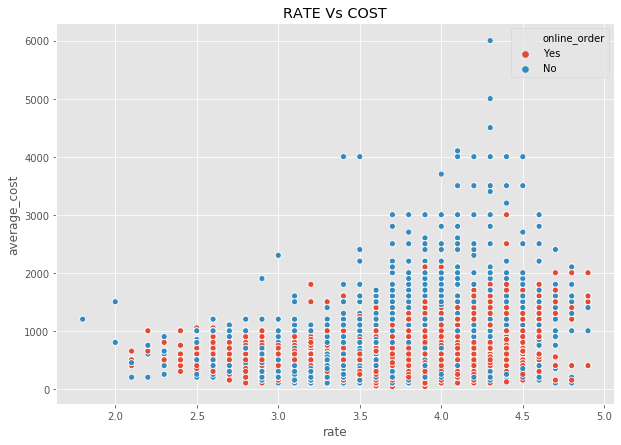

In [104]:
#Scatter plot to check the relationship
plt.figure(figsize = (10,7))
sns.scatterplot(x = "rate", y = "average_cost", hue = "online_order", data = rating_not_null)
plt.title("RATE Vs COST")
plt.show()

1. We can see that for lower ratings, the cost is also less till rating of around 3.8. After that as the rating increases, we can see some restaurants with higher average costs. 
2. But there are many cheap restaurants with higher ratings which tells us about availability of good quality food for a reasonable price.
3. Majority of the very high cost restaurants do not have online delivery, as they may be five star hotel restaurants.

#### Top Rated Restaurant in Each Location
Let us find out the top rated and top voted restaurants in each location which you can try the next time you visit that area!

In [105]:
#Rank restaurants location-wise based on rates
restaurants["rank"] = restaurants.groupby(["location"])["rate"].rank("dense", ascending=False)

#Select top ratings based on rate
top_restaurants = restaurants[restaurants["rank"] == 1.0]

#Remove duplicate records
top_restaurants = top_restaurants.drop(["meal_type", "dish_liked", "cuisines", "reviews_list", "menu_item"], axis = 1)
top_restaurants.drop_duplicates(inplace=True)

#There are multiple restaurants with rank 1 if they have the same rating, hence we will again rank them based on votes
top_restaurants["rank"] = top_restaurants.groupby("location")["votes"].rank("dense", ascending = False)

#Select top ratings based on rate and votes
top_restaurants = top_restaurants[top_restaurants["rank"] == 1.0]

#Display required columns
top_voted_rated = top_restaurants[["name", "location", "rate"]].sort_values("rate", ascending = False).head(30)
top_voted_rated_bar = go.Bar(x = top_voted_rated["location"], y = top_voted_rated["rate"],
                          text=top_voted_rated['name'], hovertemplate = "<b>%{text}</b><br><br>" + "<extra></extra>")
                          
#Hover on the graph to see the restaurant names
layout = go.Layout(title = "LOCATION-WISE TOP RATED AND TOP VOTED RESTAURANT", yaxis_title = "Rating")
fig = go.Figure(top_voted_rated_bar,layout)
iplot(fig)

#### Online orders and votes
We will investigate if there is any difference between votes of restaurants accepting and not accepting online orders.

Text(0.5, 1.0, 'VOTES FOR NO ONLINE ORDER')

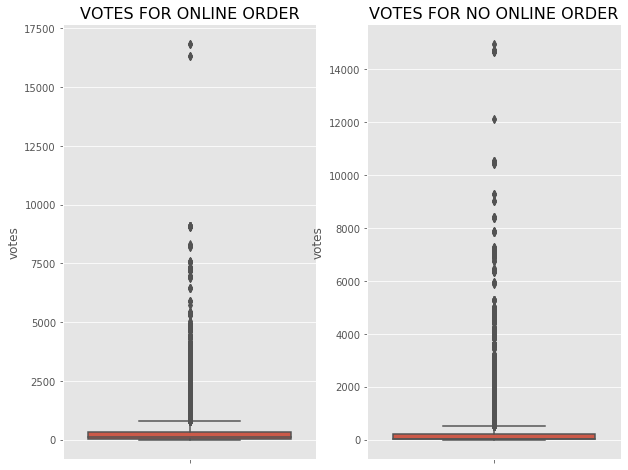

In [106]:
#Box plot of votes
fig, ax = plt.subplots(1, 2, figsize = (10,8))
votes_yes = restaurants[restaurants["online_order"] == "Yes"]
votes_no = restaurants[restaurants["online_order"] == "No"]
votes_1 = sns.boxplot(data=votes_yes, y = "votes", ax = ax[0])
votes_2 = sns.boxplot(data=votes_no, y = "votes", ax = ax[1])
votes_1.axes.set_title("VOTES FOR ONLINE ORDER", fontsize=16)
votes_2.axes.set_title("VOTES FOR NO ONLINE ORDER", fontsize=16)

1. The median number of votes for both categories vary.
2. Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

#### Area to Invest Using z-scores
Depending on the market particularities of each locality, a Rs. 450 average cost can be considered cheap, average-priced, or expensive. Let us find a neighborhood where we can invest money to open a new restaurant where a price of Rs. 450 is an average price for a meal.

We can solve this task quickly by measuring the z-score for a Rs. 450 value for each of the ten distributions/locations — each of the ten neighborhoods has its own distribution of prices with its own mean and standard deviation. We will select the ten distribution locations based on the average rating for localities (4 top rated, 4 low rated, 2 middle rated).

In [107]:
#Segregate data based on locations
restaurants_Lavelle_Road = restaurants[restaurants['location'] == 'Lavelle Road']
restaurants_St_Marks_Road = restaurants[restaurants['location'] == 'St. Marks Road']
restaurants_Koramangala_4th_Block = restaurants[restaurants['location'] == 'Koramangala 4th Block']
restaurants_Race_Course_Road = restaurants[restaurants['location'] == 'Race Course Road']
restaurants_Brigade_Road = restaurants[restaurants['location'] == 'Brigade Road']
restaurants_Bellandur = restaurants[restaurants['location'] == 'Bellandur']
restaurants_BTM = restaurants[restaurants['location'] == 'BTM']
restaurants_RT_Nagar = restaurants[restaurants['location'] == 'RT Nagar']
restaurants_Nagarbhavi = restaurants[restaurants['location'] == 'Nagarbhavi']
restaurants_Yeshwantpur = restaurants[restaurants['location'] == 'Yeshwantpur']

In [108]:
#Function to calculate the z-score
def z_score(array,value):
    mean = array.mean()
    std_dev = np.std(array, ddof = 0)
    distance = value - mean
    return (distance / std_dev)

In [109]:
#Calculate the z-score for each location
z_Lavelle_Road = z_score(restaurants_Lavelle_Road["average_cost"], 450)
print ("Lavelle Road:", z_Lavelle_Road)
z_St_Marks_Road = z_score(restaurants_St_Marks_Road['average_cost'], 450)
print ("St Marks Road:", z_St_Marks_Road)
z_Koramangala_4th_Block = z_score(restaurants_Koramangala_4th_Block['average_cost'], 450)
print ("Koramangala 4th Block:", z_Koramangala_4th_Block)
z_Race_Course_Road = z_score(restaurants_Race_Course_Road['average_cost'], 450)
print ("Race Course Road:", z_Race_Course_Road)
z_Brigade_Road = z_score(restaurants_Brigade_Road['average_cost'], 450)
print ("Brigade Road:", z_Brigade_Road)
z_Bellandur = z_score(restaurants_Bellandur['average_cost'], 450)
print ("Bellandur:", z_Bellandur)
z_BTM = z_score(restaurants_BTM['average_cost'], 450)
print ("BTM:", z_BTM)
z_RT_Nagar = z_score(restaurants_RT_Nagar['average_cost'], 450)
print ("RT Nagar:", z_RT_Nagar)
z_Nagarbhavi = z_score(restaurants_Nagarbhavi['average_cost'], 450)
print ("Nagarbhavi:", z_Nagarbhavi)
z_Yeshwantpur = z_score(restaurants_Yeshwantpur['average_cost'], 450)
print ("Yeshwantpur:", z_Yeshwantpur)

Lavelle Road: -1.2672033874891755
St Marks Road: -0.8543012313354641
Koramangala 4th Block: -0.759635552155118
Race Course Road: -1.0700429955287
Brigade Road: -0.5371838256291895
Bellandur: -0.2877769575567767
BTM: 0.11819096101379624
RT Nagar: 0.17583894588728533
Nagarbhavi: 0.0524863881081478
Yeshwantpur: 0.1446033825636452


Mean of a distribution has a z-score of 0, so our recommendation should be the location with the z-score closest to 0. Hence, we should recommend Nagarbhavi for investment.

Let us investigate the restaurant types at Nagarbhavi to add to the recommendation.

In [110]:
restaurants_Nagarbhavi["rest_type"].value_counts()

Quick Bites      2
Casual Dining    2
Name: rest_type, dtype: int64

We can invest in any restaurant types given above, or looking at the locality in more detail, we can invest in a new restaurant type as well.

#### Probability of Getting Food For Two People In Rs. 350 in a Particular Location
Can we easily find food in Rs. 350 for two people in Bengaluru?

In [190]:
#Function to calculate probability based on location
def prob(locality):
    rest_count_less_350 = restaurants[(restaurants['location'] == locality) & (restaurants['average_cost'] <= 350)].shape[0]
    rest_count_location = restaurants[restaurants['location'] == locality].shape[0]
    return (rest_count_less_350/rest_count_location)

In [191]:
#Check probability for different locations
probability = prob("Lavelle Road")
print ("Probability of getting food for two people in Rs. 350 at Lavelle Road is: ", probability)

probability = prob("Hosur Road")
print ("Probability of getting food for two people in Rs. 350 at Hosur Road is: ", probability)

probability = prob("Richmond Road")
print ("Probability of getting food for two people in Rs. 350 at Richmond Road is: ", probability)

probability = prob("BTM")
print ("Probability of getting food for two people in Rs. 350 at BTM is: ", probability)

Probability of getting food for two people in Rs. 350 at Lavelle Road is:  0.07239819004524888
Probability of getting food for two people in Rs. 350 at Hosur Road is:  0.45901639344262296
Probability of getting food for two people in Rs. 350 at Richmond Road is:  0.275626423690205
Probability of getting food for two people in Rs. 350 at BTM is:  0.47769279796048436


Lavelle road has costlier restaurants and hence the probability of getting food in less than Rs. 350 is less.

#### Total Combinations of Cafes and Casual Dining in a Particular Location
If you are in a particular location and feel like going to a cafe and Casual Dining in less than Rs.350, how many options are available for you have to choose from?

In [113]:
#Function to calculate factorial
def factorial(n):
    factorial = 1
    for i in range(1,n+1):
        factorial = factorial * i
    return factorial

#Function to calculate combinations
def combinations(n, k):
    numerator = factorial(n)
    denominator = factorial(k) * factorial(n-k)
    return numerator/denominator

In [114]:
def choices(type,locality):
    restaurant_count = restaurants[(restaurants['location'] == locality) & 
                                   (restaurants['rest_type'] == type) &
                                   (restaurants['average_cost'] <= 350)].shape[0]
    return (restaurant_count)

In [115]:
#Selecting BTM as our area of interest
cafe = choices("Cafe", "BTM")
cafe_combinations = combinations(cafe, 1)
dessert = choices("Casual Dining", "BTM")
dessert_combinations = combinations(dessert, 1)
print ("Total cafe and casual dinning combinations at BTM are: ", cafe_combinations * dessert_combinations)

Total cafe and casual dinning combinations at BTM are:  928.0


#### Restaurant Finder for your Given Location, Budget and Type
How many restaurants are there in the location of your choice, of the cuisine of your liking in your budget for two people?

In [116]:
#Function to find the list of restaurants
def find_restaurants(cost, location, type):
    return (restaurants[(restaurants["average_cost"] <= cost) 
                & (restaurants["location"] == location) 
                & (restaurants["rest_type"] == type)]["name"].unique())

In [117]:
find_restaurants(100, "BTM", "Quick Bites")

array(['Hari Super Sandwich', 'Sri Sankara Cafe', 'The Chaat Shop',
       'Just Sandwiches', 'B2D Indori Dhaba', 'Shawarma Corner',
       'Nellore Dosa Camp'], dtype=object)

#### Plot Restaurant Locations on Map
Using geocoders, we will get the latitude and longitude of the restaurants using their names and then plot them on the map of Bengaluru. This plotting on the map will give us a geographic idea about the spread of restaurants in the city.

In [118]:
#Get a list of unique restaurant locations
locations=pd.DataFrame({"location":restaurants['location'].unique()})

#Add 'Bangalore' to get the correct co-ordinates
locations['location']=locations['location'].apply(lambda x: "Bangalore " + str(x))

lat=[]
lon=[]

geolocator=Nominatim(user_agent="app")

#Create the latitude and longitude list
for location in locations['location']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        geo_lat= location.latitude
        geo_lon=location.longitude
        lat.append(geo_lat)
        lon.append(geo_lon)  

#Add latitude and longitude columns to the dataframe
locations['Latitude']=lat
locations['Longitude']=lon

In [119]:
#Remove "Bangalore" from the location list to get the original list
locations["location"]=locations['location'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

location   Latitude  Longitude
0        Banashankari  12.915221  77.573598
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.931409  77.506714
3           Jayanagar  12.929273  77.582423
4  Kumaraswamy Layout  12.906817  77.563525

In [120]:
#Merge the location DataFrame with restaurants to get the location co-ordinates in the main DataFrame
restaurants = pd.merge(left = restaurants, right = locations,on='location')

In [121]:
#Check the co-ordinates
restaurants.head(2)

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1  775.0  Banashankari   
1  Spice Elephant          Yes         No   4.1  787.0  Banashankari   

       rest_type                                         dish_liked  \
0  Casual Dining  Pasta Lunch Buffet Masala Papad Paneer Lajawab...   
1  Casual Dining  Momos Lunch Buffet Chocolate Nirvana Thai Gree...   

                         cuisines  average_cost  \
0  North Indian, Mughlai, Chinese         800.0   
1     Chinese, North Indian, Thai         800.0   

                                        reviews_list menu_item meal_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []    Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []    Buffet   

   rank   Latitude  Longitude  
0   6.0  12.915221  77.573598  
1   6.0  12.915221  77.573598

In [122]:
#Select data to plot from restaurants
data = restaurants.groupby(["location", "Latitude", "Longitude"])["name"].count().reset_index()
data.columns=['Location','Latitude', 'Longitude', 'count']
print (data.head())

#Check the maximum count
print(data['count'].max())

            Location   Latitude  Longitude  count
0                BTM  12.911276  77.604565   3138
1       Banashankari  12.915221  77.573598    660
2          Banaswadi  13.014162  77.651854    483
3  Bannerghatta Road  12.936339  77.601499   1164
4       Basavanagudi  12.941726  77.575502    515
3138


In [123]:
#Function to create the basemap object
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [124]:
#Plot the heatmap
basemap=generateBaseMap()
HeatMap(data[['Latitude','Longitude','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [61]:
basemap

#### Plot Location of Famous Quick Bites Restaurants

In [133]:
quick_bites_data = restaurants[restaurants["rest_type"] == "Quick Bites"]
quick_bites_data = quick_bites_data.groupby(["location", "Latitude", "Longitude"])["name"].count().reset_index()
quick_bites_data.columns=['Location','Latitude', 'Longitude', 'count']
print (quick_bites_data.head())

#Check the maximum count
print(quick_bites_data['count'].max())

            Location   Latitude  Longitude  count
0                BTM  12.911276  77.604565   1516
1       Banashankari  12.915221  77.573598    301
2          Banaswadi  13.014162  77.651854    232
3  Bannerghatta Road  12.936339  77.601499    455
4       Basavanagudi  12.941726  77.575502    283
1516


In [134]:
basemap=generateBaseMap()
HeatMap(quick_bites_data[['Latitude','Longitude', 'count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [135]:
basemap

#### Add Restaurant Sentiment
1. We will use the vadersentiment for analyzing the news text. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
2. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
3. We will use the polarity_scores() method to obtain the polarity indices for the given sentence. It will return a sentiment dictionary containing positive, negative, neutral and compound scores.
4. The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. The compound score is computed by summing the __[valence scores](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt)__ (sentiment intensity on a scale from –4 to +4) of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive)

The review column has text data and needs to be cleaned before we use it. 

In [136]:
#Clean and separate the review column data into a separate dataframe
from tqdm import tqdm
all_ratings = []
for name,ratings in tqdm(zip(restaurants['name'],restaurants['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

38384it [00:38, 988.56it/s] 


In [159]:
rating_df = pd.DataFrame(all_ratings,columns = ['name','rating','review'])
rating_df['review'] = rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [167]:
rating_df.drop_duplicates(inplace=True)
rating_df.head()

name  rating                                             review
0  Jalsa     4.0  A beautiful place to dine inThe interiors take...
1  Jalsa     4.0  I was here for dinner with my family on a week...
2  Jalsa     2.0  Its a restaurant near to Banashankari BDA Me a...
3  Jalsa     4.0  We went here on a weekend and one of us had th...
4  Jalsa     5.0  The best thing about the place is its ambiance...

As our dataset is large, we will assign sentiment to the top voted and top rated restaurant - Punjab Grill and see how the sentiment varies.

In [162]:
#Create a function to assign a sentiment - (Positive, Negative or Neutral) to each news
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence): 
    #Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer() 
  
    #The polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
    #Assign sentiment using the VADER scoring methodology
    if sentiment_dict['compound'] >= 0.05 : 
        return ("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return ("Negative") 
  
    else : 
        return ("Neutral") 

In [192]:
#Calculate hotel sentiments
rating_Punjab_Grill = rating_df[rating_df["name"] == "Punjab Grill"]
rating_Punjab_Grill["sentiment"] = rating_Punjab_Grill["review"].apply(sentiment_scores)
rating_Punjab_Grill

C:\Users\phtel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



name  rating  \
678713   Punjab Grill     5.0   
678714   Punjab Grill     5.0   
678715   Punjab Grill     5.0   
678716   Punjab Grill     5.0   
678717   Punjab Grill     4.0   
678718   Punjab Grill     5.0   
678719   Punjab Grill     5.0   
678720   Punjab Grill     5.0   
678721   Punjab Grill     5.0   
678722   Punjab Grill     4.0   
678723   Punjab Grill     5.0   
678724   Punjab Grill     4.0   
678725   Punjab Grill     4.0   
678726   Punjab Grill     5.0   
678727   Punjab Grill     5.0   
678732   Punjab Grill     5.0   
678733   Punjab Grill     4.0   
678734   Punjab Grill     4.0   
678741   Punjab Grill     4.0   
678744   Punjab Grill     5.0   
694549   Punjab Grill     5.0   
694550   Punjab Grill     4.0   
694551   Punjab Grill     3.0   
694552   Punjab Grill     4.0   
694553   Punjab Grill     5.0   
1087121  Punjab Grill     5.0   
1087122  Punjab Grill     4.0   
1087123  Punjab Grill     5.0   
1087124  Punjab Grill     4.0   
1087125  Punjab Grill     5.0   
1087126  Punjab Grill     5.0   
1087127  Punjab Grill     5.0   
1087128  Punjab Grill     4.0   
1087129  Punjab Grill     5.0   
1087130  Punjab Grill     4.0   
1087131  Punjab Grill     5.0   
1087132  Punjab Grill     5.0   
1087133  Punjab Grill     5.0   
1087134  Punjab Grill     5.0   
1087135  Punjab Grill     4.0   
1087156  Punjab Grill     4.0   
1087162  Punjab Grill     5.0   
1087163  Punjab Grill     5.0   
1087164  Punjab Grill     5.0   
1087171  Punjab Grill     5.0   
1087172  Punjab Grill     5.0   
1087173  Punjab Grill     3.0   
1087174  Punjab Grill     5.0   
1087175  Punjab Grill     5.0   
1087191  Punjab Grill     5.0   
1087192  Punjab Grill     4.0   
1087193  Punjab Grill     3.0   
1087197  Punjab Grill     5.0   
1087199  Punjab Grill     1.0   
1087202  Punjab Grill     4.0   
1087205  Punjab Grill     4.0   
1087206  Punjab Grill     4.0   
1087207  Punjab Grill     4.0   
1095337  Punjab Grill     5.0   

                                                    review sentiment  
678713   The food is greatthe ambience is perfect and t...  Positive  
678714   Cant expect a better taste spices and masala w...  Positive  
678715   Food taste  quality was amazing Service was ex...  Positive  
678716   I had dinner with friends out here and we real...  Positive  
678717   Good ambience good food good service\nA very g...  Positive  
678718   We had a lovely time at Punjab Pearl The food ...  Positive  
678719   This place sheds royalty with its amazing ambi...  Positive  
678720   We went for a lunch to this place and opted fo...  Positive  
678721   When I visited newly opened Punjab Grill in Wh...  Positive  
678722   The food and the ambiance are really great Had...  Positive  
678723   Punjab grill lived upto its name We went for a...  Positive  
678724   Delicious Indian north western cuisinethe dal ...  Positive  
678725   New mall close to our house we wanted to check...  Positive  
678726   The great place to have some north indian food...  Positive  
678727   It was my time to relish the authentic culinar...  Positive  
678732   Punjab Grill is newly opened a fresh new setup...  Positive  
678733   Ambiance  35  Tables are too close so noise wa...  Positive  
678734   Had a good dining experience here  The host dh...  Positive  
678741   A warm welcome sets the tone for a good Restur...  Positive  
678744   Love the decor ambience and most of all food I...  Positive  
694549   This place is a must visit for all north india...  Positive  
694550   What a costly food it was 675 rs chicken tikka...  Positive  
694551   Nice ambience very polite staff but the glasse...  Positive  
694552   We tried the buffet here The ambience is very ...  Positive  
694553   Very good food and service The sheekh kababs w...  Positive  
1087121  One of the best places I had visited and few 5...  Positive  
1087122  I was here with my parents for lunch The food ...  Positive  
1087123  One of the best Indian Cuisine restaura

In [182]:
#Check hotel sentiment
hotel_sentiments = rating_Punjab_Grill.groupby("sentiment", as_index=False)["name"].count()

word_freq_bar = go.Bar(x = hotel_sentiments["sentiment"], y = hotel_sentiments["name"])                      
layout = go.Layout(title = "HOTEL SENTIMENTS", yaxis_title = "Count")
fig = go.Figure(word_freq_bar,layout)
iplot(fig)

Punjab Grill is truly enjoyed by customers and has majority of positive reviews.

#### Wordcloud of Reviews Based on Restaurant Name and Rating

In [68]:
#Function to create a wordcloud using restaurant name and rating
def review_word_cloud(name, rating):
    restaurant_data = rating_df[(rating_df['name'] == name) & (rating_df["rating"] >= rating)]
    words = " ".join(rating_df['review'])
                 
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return (words)

Let us look at the positive reviews for Jalsa restaurant where we will look for words in reviews having rating greater than 3.

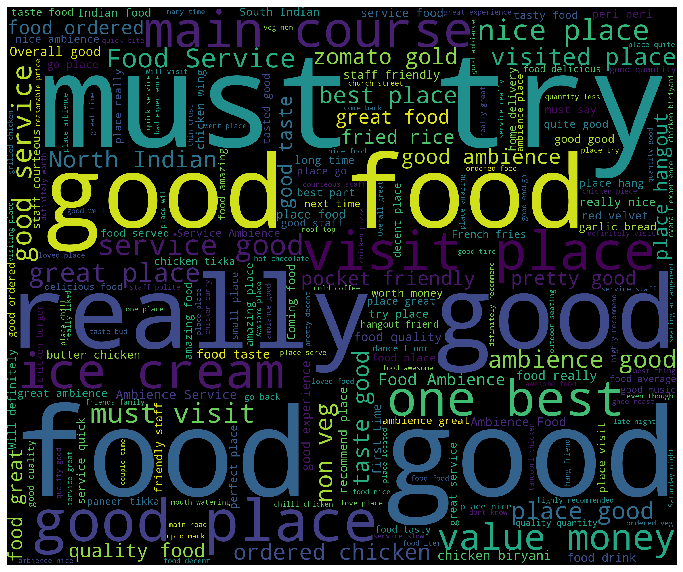

In [69]:
reviews = review_word_cloud("Jalsa", 3)

Jalsa has a lot of positive reviews indicating that customers are enjoying their food and service!

#### Wordcloud of Cuisines
Create a wordcloud of different dishes in cuisines.

In [70]:
#Function to create a wordcloud using cuisine
def dishes_by_cuisines(cuisine):
    restaurant_data = restaurants[restaurants['rest_type'] == cuisine]
    notnull_dishes = restaurants[restaurants["dish_liked"].notnull()]
    words =str(notnull_dishes['dish_liked'])
                 
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return (words)

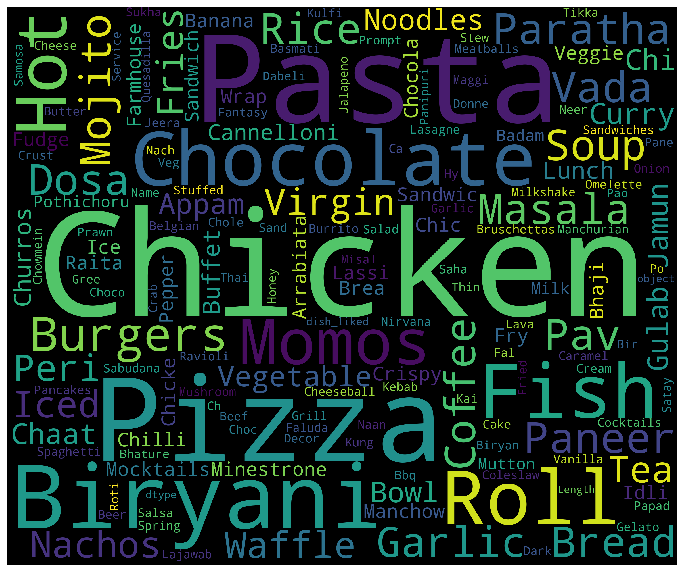

In [71]:
cuisines = dishes_by_cuisines("Cafe")

Cafes are offering quite a variety of food!

### Summary
We analyzed the restaurant data to see their distribution in different localities, see how rating, average cost and cuisines vary. We also found high rated restaurants and localities, popular cuisines in Bengaluru. We found an area to invest for a new restaurant using z-scores and also implemented a restaurant finder. We plot the restaurant locations on a map to get a geographic idea about the spread of restaurants in the city. We found that:

1. Majority of the ratings are between 3.5 - 4.3.
2. BTM has the highest number of restaurants followed by Kormangala 5th block. Cafe Coffee Day followed by Onesta are famous chains in Bengaluru.
3. Maximum number of restaurants have delivery option. Majority of the restaurants are Quick Bites, followed by Casual Dining restaurants. North Indian and Chinese are popular cuisines. 
4. Vast majority of the restaurants serve food for budget less than Rs. 1000. The median approximate cost for two people is Rs. 500 for a single meal. You can find good food for a reasonable price.
5. Lavelle Road has the highest average rating of 4.16 followed by Kormangla 3rd Block, 5th Block, Church Street and St. Marks Road. Old Madras road has the lowest averagae rating of 3.18, followed closely by Bommanahalli and Peenya.
6. Bengaluru has many high rated Pubs and Breweries followed by cafes.